In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 4 - Clustering/Section 25 - Hierarchical Clustering/Python/Mall_Customers.csv')
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [35]:
x = df.iloc[:,[3,4]].values
# print(x)

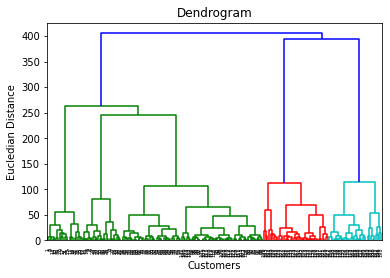

In [36]:
#find the optimal value of clusters required at the end of the clustering
import scipy.cluster.hierarchy as sch
dg = sch.dendrogram(sch.linkage(x , method= 'ward'))
# Ward´s linkage is a method for hierarchical cluster analysis . The idea has much in common with analysis of variance (ANOVA).
# The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) 
# after fusing two clusters into a single cluster.
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distance')
plt.show()

In [37]:
# k = 3/5 (largest eucledian distance b/w two horizontal bars)
# training of heirarchy cluster model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage='ward')
hc.fit(x)

AgglomerativeClustering(n_clusters=5)

In [38]:
#prediction
y_hc = hc.fit_predict(x)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


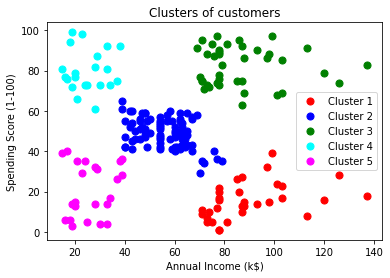

In [39]:
#visualizing the clusters (k=5)
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'red', label = 'Cluster 1')  # (cluster 0, x[0])
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()